In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
import os
import cv2

In [2]:
#  Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))



Epoch 1/10
469/469 [==============================] - 24s 47ms/step - loss: 0.2145 - accuracy: 0.9371 - val_loss: 0.0530 - val_accuracy: 0.9836
Epoch 2/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0551 - accuracy: 0.9825 - val_loss: 0.0426 - val_accuracy: 0.9859
Epoch 3/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0398 - accuracy: 0.9877 - val_loss: 0.0358 - val_accuracy: 0.9886
Epoch 4/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0299 - val_accuracy: 0.9900
Epoch 5/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0300 - val_accuracy: 0.9904
Epoch 6/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0184 - accuracy: 0.9941 - val_loss: 0.0295 - val_accuracy: 0.9911
Epoch 7/10
469/469 [==============================] - 21s 46ms/step - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.0303 - val_accuracy:

Test loss: 0.030147818848490715
Test accuracy: 0.991100013256073


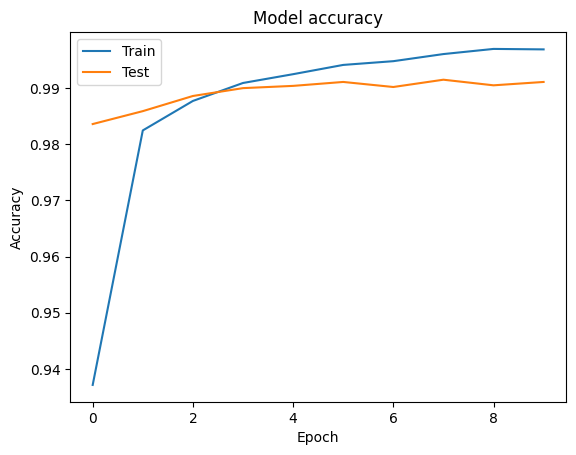

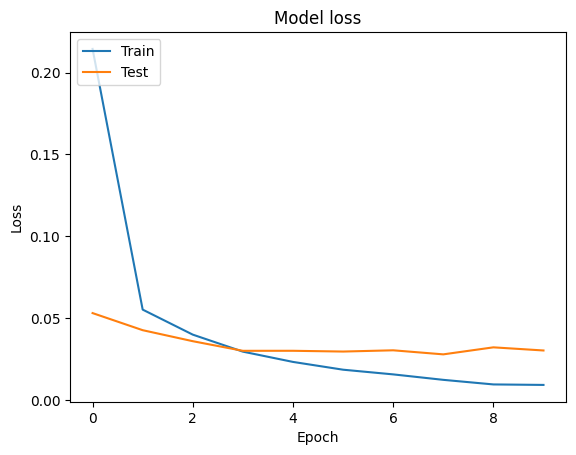

In [4]:
# Evaluate model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 18ms/step
The number is probably a 7


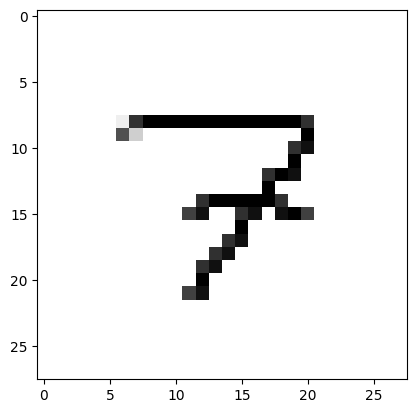

1/1 [==============================] - 0s 16ms/step
The number is probably a 2


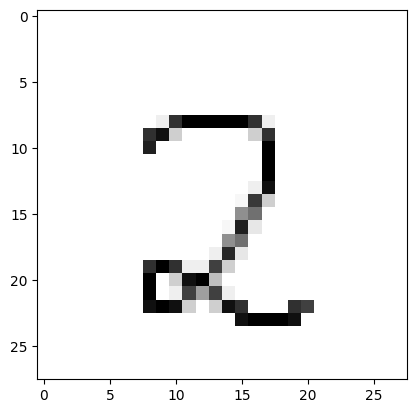

1/1 [==============================] - 0s 16ms/step
The number is probably a 9


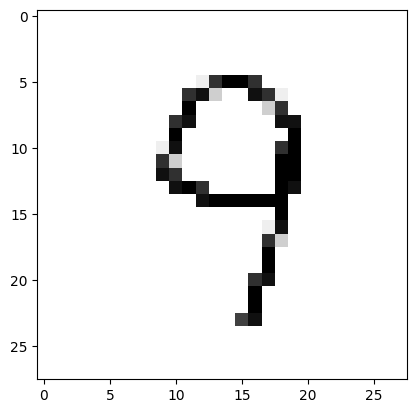

1/1 [==============================] - 0s 18ms/step
The number is probably a 8


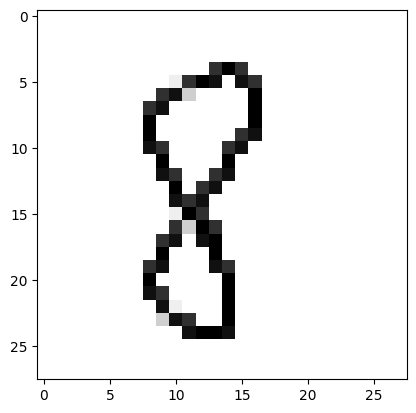

1/1 [==============================] - 0s 19ms/step
The number is probably a 5


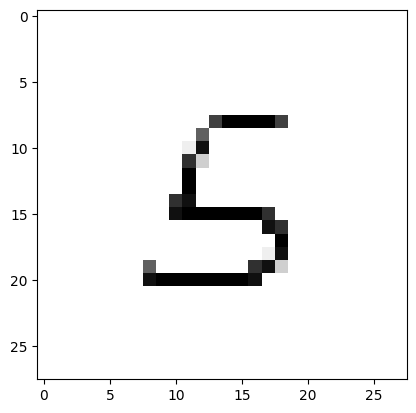

1/1 [==============================] - 0s 17ms/step
The number is probably a 1


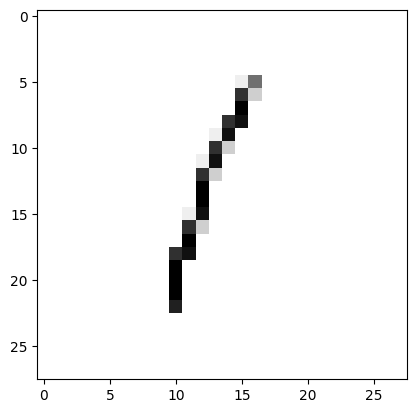

1/1 [==============================] - 0s 17ms/step
The number is probably a 1


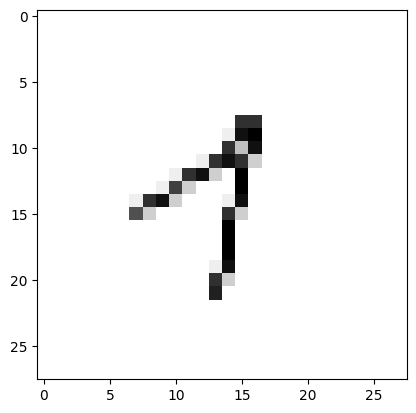

1/1 [==============================] - 0s 17ms/step
The number is probably a 6


1/1 [==============================] - 0s 17ms/step
The number is probably a 7


1/1 [==============================] - 0s 15ms/step
The number is probably a 7


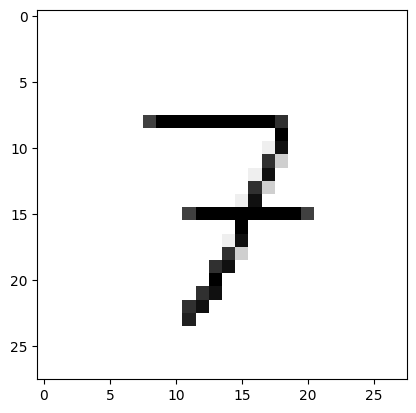

1/1 [==============================] - 0s 18ms/step
The number is probably a 0


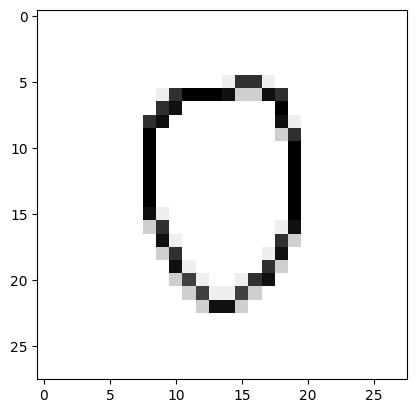

1/1 [==============================] - 0s 18ms/step
The number is probably a 5


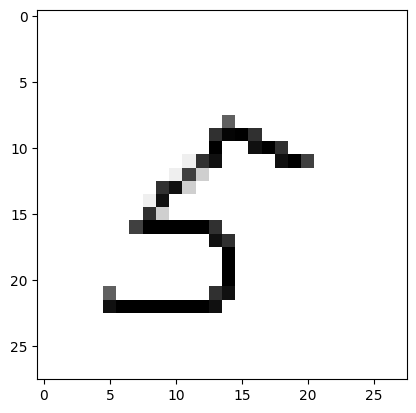

1/1 [==============================] - 0s 16ms/step
The number is probably a 3


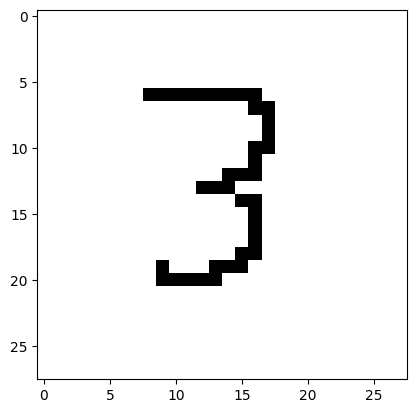

1/1 [==============================] - 0s 17ms/step
The number is probably a 2


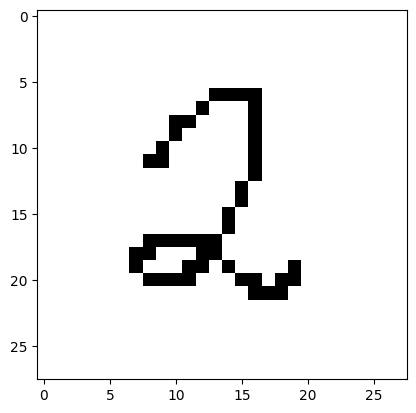

1/1 [==============================] - 0s 18ms/step
The number is probably a 1


1/1 [==============================] - 0s 17ms/step
The number is probably a 0


1/1 [==============================] - 0s 16ms/step
The number is probably a 8


1/1 [==============================] - 0s 16ms/step
The number is probably a 7


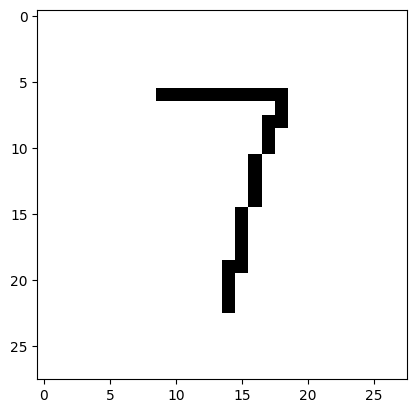

1/1 [==============================] - 0s 16ms/step
The number is probably a 4


In [31]:
image_number = 1
while os.path.isfile('digits/digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('digits/digit{}.png'.format(image_number))[:,:,0]
        img = cv2.resize(img, (28, 28))
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1


In [32]:
model.save('english_digit_recognition.h5')